In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as dt
import seaborn as sns
import re

# set the graphs to show in the jupyter notebook
%matplotlib inline

# set seabor graphs to a better style
sns.set(style="ticks")
import os

In [2]:
%cd C:\Users\91907\Downloads\Python Foundation Case Study 2 - Credit Card Case Study

C:\Users\91907\Downloads\Python Foundation Case Study 2 - Credit Card Case Study


In [3]:
Customer_Acqusition=pd.read_csv('Customer Acqusition.csv')
spend=pd.read_csv('spend.csv')
ccdata=pd.read_excel('Credit Card Data.xlsx')
repayment=pd.read_csv('Repayment.csv')

# 1. In the above dataset,

# a. In case age is less than 18, replace it with mean of age values.
 



In [8]:
Customer_Acqusition.Age=np.where(Customer_Acqusition.Age<18,Customer_Acqusition.Age.mean(),Customer_Acqusition.Age)


# b. In case spend amount is more than the limit, replace it with 50% of that customer’s limit. (customer’s limit provided in acquisition table is the per transaction limit on his card)

 

In [6]:
jt=pd.merge(left=spend,right=Customer_Acqusition,how='inner',left_on='Customer',right_on='Customer')
jt
jt.Amount=np.where(jt.Amount>jt.Limit,0.5*jt.Limit,jt.Amount)

# c. Incase the repayment amount is more than the limit, replace the repayment with the limit.



In [9]:
jtl=pd.merge(left=Customer_Acqusition,right=repayment,how='inner',on='Customer')
jtl.Amount=np.where(jtl.Amount>jtl.Limit,jtl.Limit,jtl.Amount)
jtl

,No,Customer,Age,City,Product,Limit,Company,Segment,SL No:,Month,Amount,Unnamed: 4
0,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,NaN,12-Jan-04,495414.75,NaN
1,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,2.0,3-Jan-04,245899.02,NaN
2,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,3.0,15-Jan-04,259490.06,NaN
3,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,4.0,25-Jan-04,437555.12,NaN
4,1,A1,76.0,BANGALORE,Gold,500000.0,C1,Self Employed,5.0,17-Jan-05,165972.88,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
1495,96,A96,54.0,CHENNAI,Silver,100000.0,C19,Salaried_Pvt,98.0,25-Jan-04,100000.00,NaN
1496,97,A97,58.0,TRIVANDRUM,Platimum,10000.0,C20,Govt,99.0,12-Jan-04,10000.00,NaN
1497,98,A98,51.0,CALCUTTA,Platimum,10001.0,C21,Normal Salary,100.0,3-Jan-04,10001.00,NaN
1498,99,A99,35.0,CALCUTTA,Platimum,10002.0,C22,Self Employed,101.0,15-Jan-04,10002.00,NaN


# 2. From the above dataset create the following summaries:

 

# a. How many distinct customers exist?

In [10]:
(~Customer_Acqusition.Customer.duplicated()).sum()

100

# b. How many distinct categories exist?
 

In [11]:
(~Customer_Acqusition.Segment.duplicated()).sum()

5

In [27]:
import datetime
from datetime import datetime as dt

# c. What is the average monthly spend by customers?
 

In [12]:
spend.Month=spend.Month.astype('datetime64')
spend['mth']=spend.Month.dt.month
avg_mont_expense=pd.pivot_table(data=spend,index=['mth','Customer'],values='Amount',aggfunc='mean')
avg_mont_expense

Amount
mth Customer               
1   A1        372762.587143
    A10       161144.326667
    A100      224786.880000
    A11       130298.903333
    A12       343885.410000
...                     ...
12  A54       155708.160000
    A56       223628.270000
    A58       167643.950000
    A61        62914.030000
    A64       393513.710000

[578 rows x 1 columns]

# d. What is the average monthly repayment by customers?


In [13]:
repayment.Month=repayment.Month.astype('datetime64')
repayment['mth']=repayment['Month'].dt.month
avg_repay=pd.pivot_table(data=repayment,index=['mth','Customer'],values='Amount',aggfunc='mean')
avg_repay

Amount
mth  Customer               
1.0  A1        343972.327143
     A10       272897.385000
     A100       69551.190000
     A11       319518.796667
     A12       203397.863333
...                      ...
12.0 A56       162103.090000
     A57       194338.110000
     A6         27398.180000
     A64       212614.480000
     A7        429700.120000

[558 rows x 1 columns]

# e. If the monthly rate of interest is 2.9%, what is the profit for the bank for each month? 
(Profit is defined as interest earned on Monthly Profit. Monthly Profit = Monthly repayment – Monthly spend. Interest is earned only on positive profits and not on negative amounts)


In [14]:
repayspend=pd.merge(left=spend,right=repayment,how='inner',on='Customer')
repayspend
table=pd.pivot_table(data=repayspend,index=['mth_x'],values=['Amount_x','Amount_y'],aggfunc='sum')
table['profit']=(table.Amount_y-table.Amount_x)
prft=table[table.profit>0]
prft['interest']=(prft.profit)*0.029
prft

C:\Users\91907\AppData\Local\Temp/ipykernel_20292/667617753.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  prft['interest']=(prft.profit)*0.029


,Amount_x,Amount_y,profit,interest
mth_x,,,,
2,1.363412e+09,1.451522e+09,88110652.85,2.555209e+06
3,1.363808e+09,1.373256e+09,9448897.00,2.740180e+05
4,9.090117e+08,9.488581e+08,39846449.70,1.155547e+06
5,1.272817e+09,1.310234e+09,37416584.84,1.085081e+06
6,3.880553e+08,4.063657e+08,18310380.32,5.310010e+05
8,2.632131e+08,2.749142e+08,11701099.63,3.393319e+05
9,2.430704e+08,2.715815e+08,28511150.25,8.268234e+05
10,1.537719e+08,1.813678e+08,27595887.64,8.002807e+05
12,1.307270e+08,1.652582e+08,34531130.99,1.001403e+06


# f. What are the top 5 product types?
 


In [15]:

pd.pivot_table(data=spend,index='Type',values='Amount',aggfunc='sum').sort_values(by='Amount',ascending=False).head(5)

,Amount
Type,
PETRO,49863174.09
CAMERA,41481571.96
FOOD,37773338.43
TRAIN TICKET,33067077.15
AIR TICKET,32955445.42


# g. Which city is having maximum spend?


In [16]:
city_max=pd.merge(left=spend,right=ccdata,how='inner',on='Customer')
pd.pivot_table(data=city_max,index=['City'],values='Amount',aggfunc='sum').sort_values(by='Amount',ascending=False)

,Amount
City,
COCHIN,73495349.26
BANGALORE,69342631.62
CALCUTTA,64415760.01
BOMBAY,50828266.74
CHENNAI,32674988.07
TRIVANDRUM,25761239.41
PATNA,24609274.54
DELHI,23516564.54


# h. Which age group is spending more money?


In [17]:
cust_spend=pd.merge(left=Customer_Acqusition,right=spend,how='inner',on='Customer')
cust_spend['age_group']=np.where(cust_spend.Age>=60,'senior',np.where(cust_spend.Age>=30,'Adult','Youth'))
pd.pivot_table(data=cust_spend,index='age_group',values='Amount',aggfunc='sum').sort_values(by='Amount',ascending=False)

,Amount
age_group,
Adult,1.976996e+08
Youth,8.823858e+07
senior,7.870585e+07


# i. Who are the top 10 customers in terms of repayment?

 


In [19]:
repayment
pd.pivot_table(data=repayment,index='Customer',values='Amount',aggfunc='sum').sort_values(by='Amount',ascending=False).head(10)

,Amount
Customer,
A61,10539142.91
A60,9876290.74
A13,9572000.66
A22,9372561.68
A21,9056336.15
A43,8489871.46
A45,8448334.87
A12,8334760.16
A48,8292416.75


# 3. Calculate the city wise spend on each product on yearly basis. Also include a graphical representation for the same.



In [22]:
x=pd.merge(left=spend,right=ccdata,how='inner',on='Customer')
x['year']=x.Month.dt.year
city_spend=pd.pivot_table(data=x,index=['City','Product'],columns=['year'],values='Amount',aggfunc='sum')
city_spend

year                       2004         2005         2006
City       Product                                       
BANGALORE  Gold      9289878.54  12892362.99  12030611.09
           Platimum  6046763.93   7784194.68   5620904.86
           Silver    6773901.65   3936068.22   4967945.66
BOMBAY     Gold      6987853.53   8983018.28   7917144.31
           Platimum  5199581.00   5134074.48   7547549.72
           Silver    3061805.08   2368375.97   3628864.37
CALCUTTA   Gold      7477140.98  10303355.80  11167532.77
           Platimum  5961165.93   8810284.03  11305526.03
           Silver    3321963.10   1285609.11   4783182.26
CHENNAI    Gold      1059618.50   3740945.58   2704288.62
           Platimum  5558572.68   8868435.43   6921130.79
           Silver    1156129.37   1000540.48   1665326.62
COCHIN     Gold      7315850.15  12110613.03  10499142.38
           Platimum  8472832.23  10856722.82  12453968.83
           Silver    4587738.70   2619231.25   4579249.87
DELHI      Gold      2806495.00   1964845.27   2957103.32
           Platimum  1565199.90   2068490.16    764247.73
           Silver    4293224.28   2515127.59   4581831.29
PATNA      Gold      2072567.90   3252615.77   2276181.69
           Platimum  1113069.60   2883231.07   1256137.65
           Silver    3398795.65   5244763.90   3111911.31
TRIVANDRUM Gold      2415102.84   1240375.85   2735710.87
           Platimum  3761433.87   7186762.35   4174473.45
           Silver     795897.19   1445540.63   2005942.36

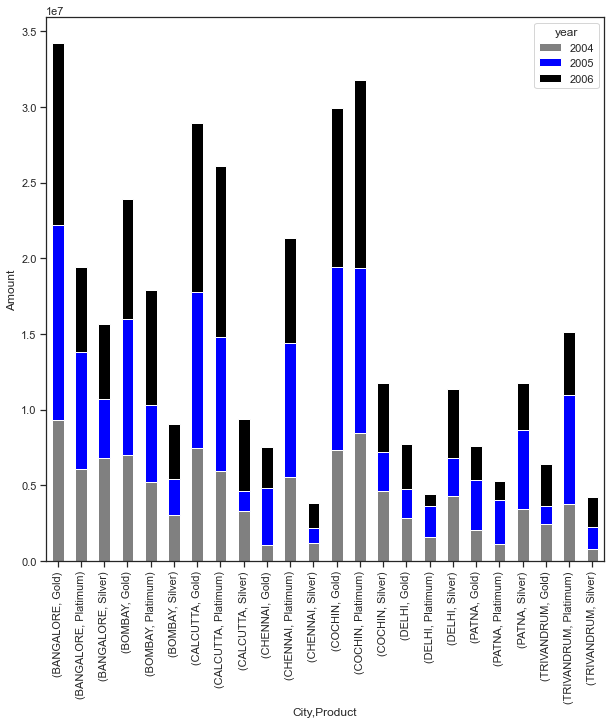

In [23]:
city_spend.plot(kind='bar',stacked=True,figsize=[10,10],ylabel='Amount',color=['grey','blue','black'])
plt.show()

# 4. Create graphs for
 

# a. Monthly comparison of total spends, city wise


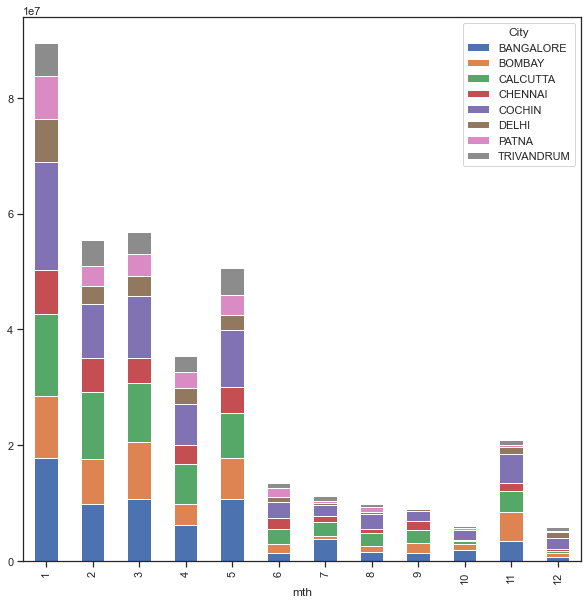

In [30]:

pd.pivot_table(data=x,index='mth',columns='City',values='Amount',aggfunc='sum').plot(kind='bar',stacked=True,figsize=[10,10])
plt.show()

# b. Comparison of yearly spend on air tickets
 

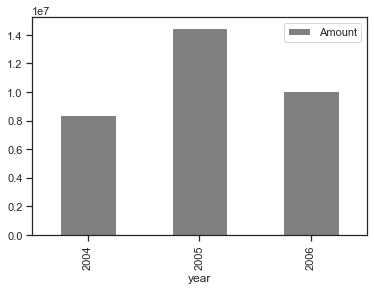

In [31]:
spend['year']=spend.Month.dt.year
spend1=spend[spend.Type=='AIR TICKET']
pd.pivot_table(data=spend1,index='year',values='Amount',aggfunc='sum').plot(kind='bar',color='grey')
plt.show()

# c. Comparison of monthly spend for each product (look for any seasonality that exists in terms of spend)
 


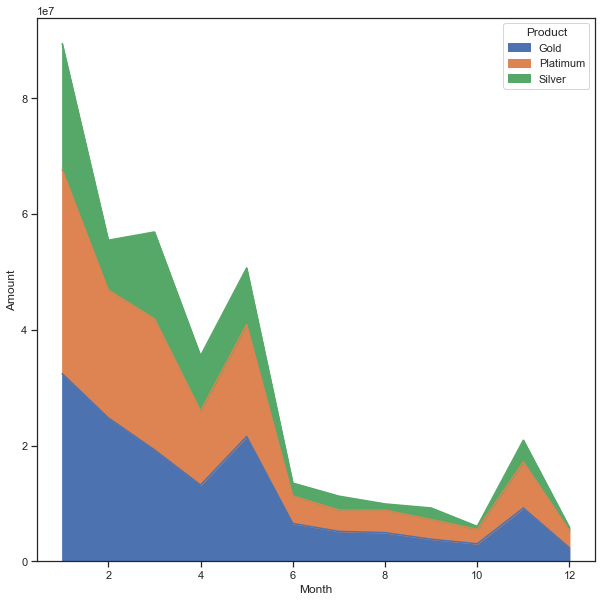

In [32]:
x
pd.pivot_table(data=x,index='mth',columns='Product',values='Amount',aggfunc='sum').plot(kind='area',figsize=[10,10],xlabel='Month',ylabel='Amount')
plt.show()

# 5. Write user defined PYTHON function to perform the following analysis:
You need to find top 10 customers for each city in terms of their repayment amount by different products and by different time periods i.e. year or month. The user should be able to specify the product (Gold/Silver/Platinum) and time period (yearly or monthly) and the function should automatically take these inputs while identifying the top 10 customers.




In [35]:
credit_repay=pd.merge(left=repayment,right=ccdata,how='inner',on='Customer')
credit_repay['year']=credit_repay.Month.dt.year
product=input('enter the product:')
time_period=int(input('enter the year:'))
city_name=input('enter the city:')
t=credit_repay[(credit_repay.Product==product)&(credit_repay.year==time_period)&(credit_repay.City==city_name)]
def cust_func(product,time_period,city_name):
    y=pd.pivot_table(data=t,index=['City','Customer','year','Product'],values='Amount',aggfunc='sum').sort_values(by='Amount',ascending=False).head(10)
    return y
cust_func(product,time_period,city_name)

enter the product:Gold
enter the year:2004
enter the city:DELHI


Amount
City  Customer year Product            
DELHI A44      2004 Gold     2149383.50
      A93      2004 Gold      342326.14